### Importing Libraries

In [1]:
## Basic packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Evaluation packages
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Preliminary settings
sns.set(color_codes=True)
%matplotlib inline

### Input file read

In [2]:
filepath = "data/"
heart_data = pd.read_csv(filepath + "heart.csv")
print(heart_data.shape)
heart_data.head()


(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


([<matplotlib.patches.Wedge at 0x7fa8e244b6a0>,
 [Text(0.5986246155747553, 0.9228480750524306, 'Women'),
  Text(-0.5986247019780251, -0.9228480190051451, 'Men')],
 [Text(0.32652251758623013, 0.5033716773013257, ' 32%'),
  Text(-0.32652256471528635, -0.5033716467300792, ' 68%')])

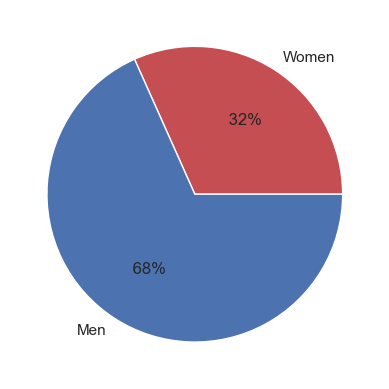

In [29]:
# heart_data.sex.plot(kind="pie",  legend=True)
len(heart_data[heart_data["sex"]==1])
p=[len(heart_data[heart_data["sex"]==0]), len(heart_data[heart_data["sex"]==1])]
labels=['Women', 'Men']
plt.pie(p, labels=labels, autopct='%3.f%%', colors="rb")

In [119]:
heart_data.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Identifying occurrence of values in each column


In [120]:

for i in heart_data.columns: 
    print( i , heart_data[i].value_counts())
    
# We found these columns as categorical data 
# (represented below is the number of unique values present in each column):  
# sex -2, cp - 4, fbs - 3 , restecg - 3 , exng -2 , slp - 3, caa - 5, thall - 4, output - label - 2


age 58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
sex 1    207
0     96
Name: sex, dtype: int64
cp 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
trtbps 120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     

### Modifying data type of categorical data

In [121]:


for i in ["output"]:
    heart_data[i] = heart_data[i].astype("category")
    

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    int64   
 11  caa       303 non-null    int64   
 12  thall     303 non-null    int64   
 13  output    303 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 31.3 KB


### Checking whether nulls present in data set

In [122]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Identifying duplicate rows in the data set

In [123]:

heart_data[heart_data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Removing duplicate rows in the data set

In [124]:

print(heart_data.shape)
heart_data = heart_data.drop_duplicates(subset= None, keep= 'first')
heart_data.shape

(303, 14)


(302, 14)

In [125]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    int64   
 2   cp        302 non-null    int64   
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    int64   
 6   restecg   302 non-null    int64   
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    int64   
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    int64   
 11  caa       302 non-null    int64   
 12  thall     302 non-null    int64   
 13  output    302 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 33.4 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

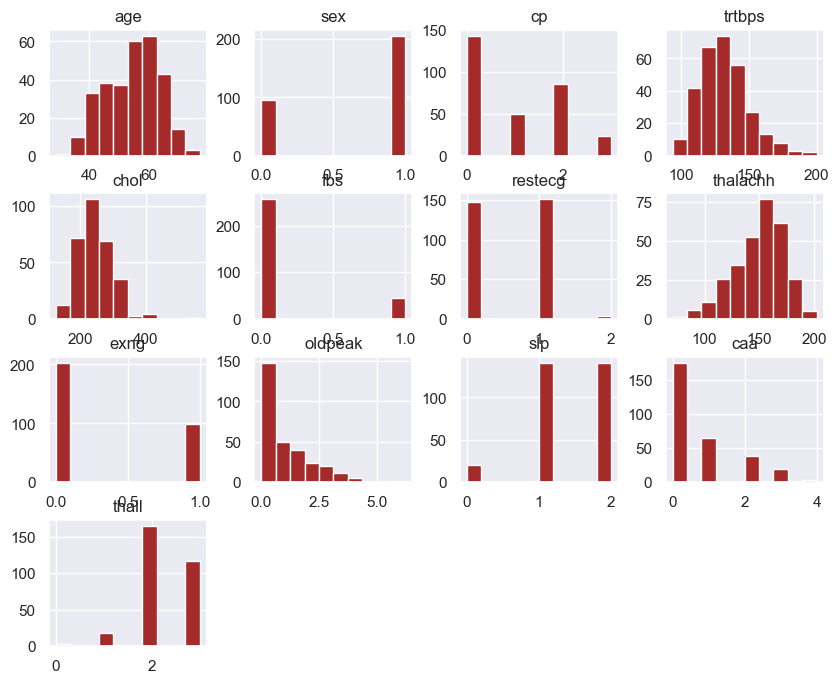

In [126]:
heart_data.hist(figsize=(10,8), color="brown")


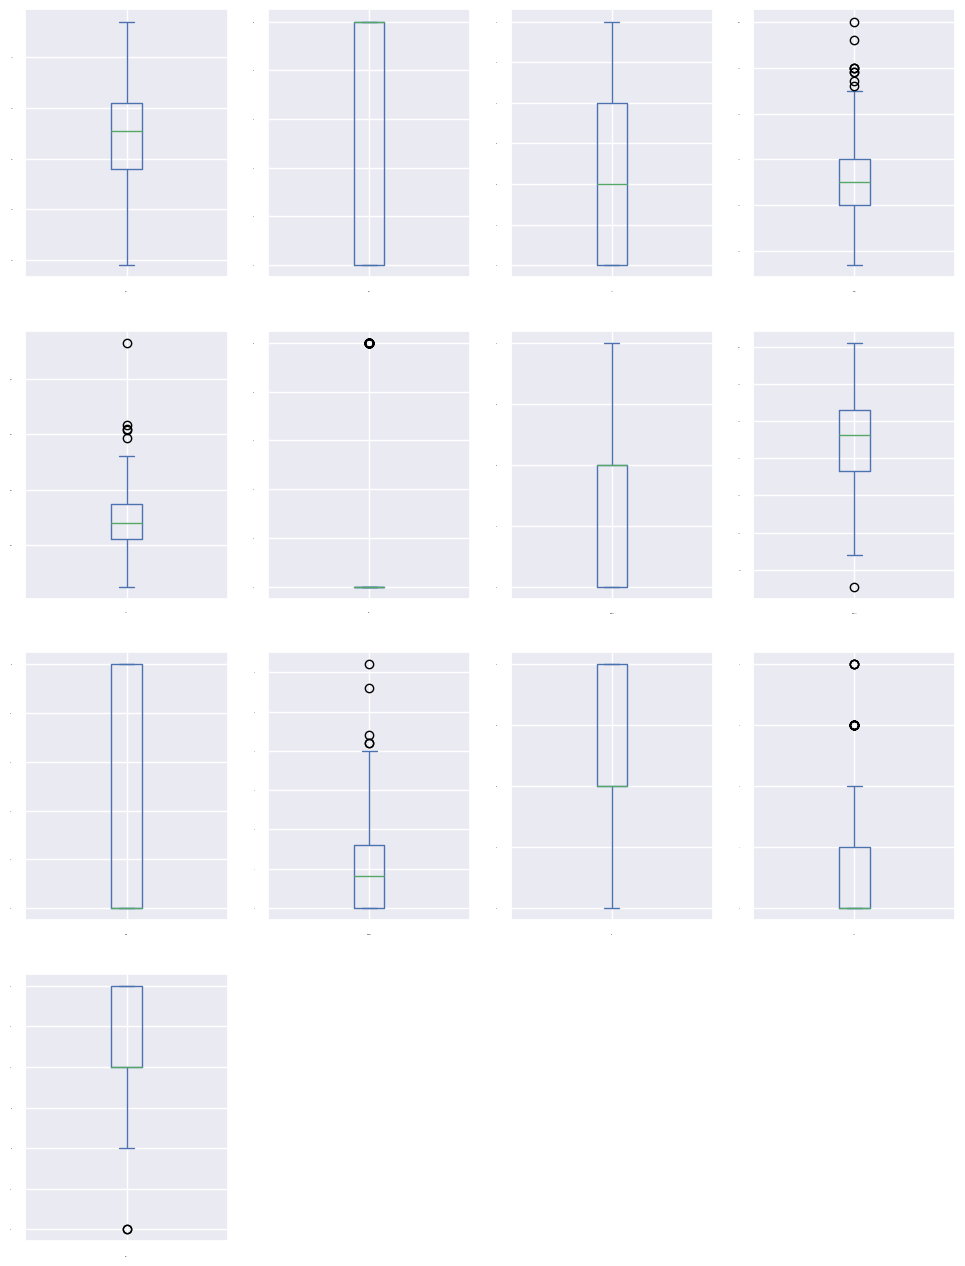

In [127]:
heart_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

In [128]:
for x in ['trtbps', "chol", "thalachh", 'oldpeak']:
    q75,q25 = np.percentile(heart_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #print(x, max, min)
 
    heart_data.loc[heart_data[x] < min,x] = np.nan
    heart_data.loc[heart_data[x] > max,x] = np.nan

In [129]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      9
chol        5
fbs         0
restecg     0
thalachh    1
exng        0
oldpeak     5
slp         0
caa         0
thall       0
output      0
dtype: int64

In [130]:
cleaned_hd = heart_data.dropna()

In [131]:
cleaned_hd.shape

(283, 14)

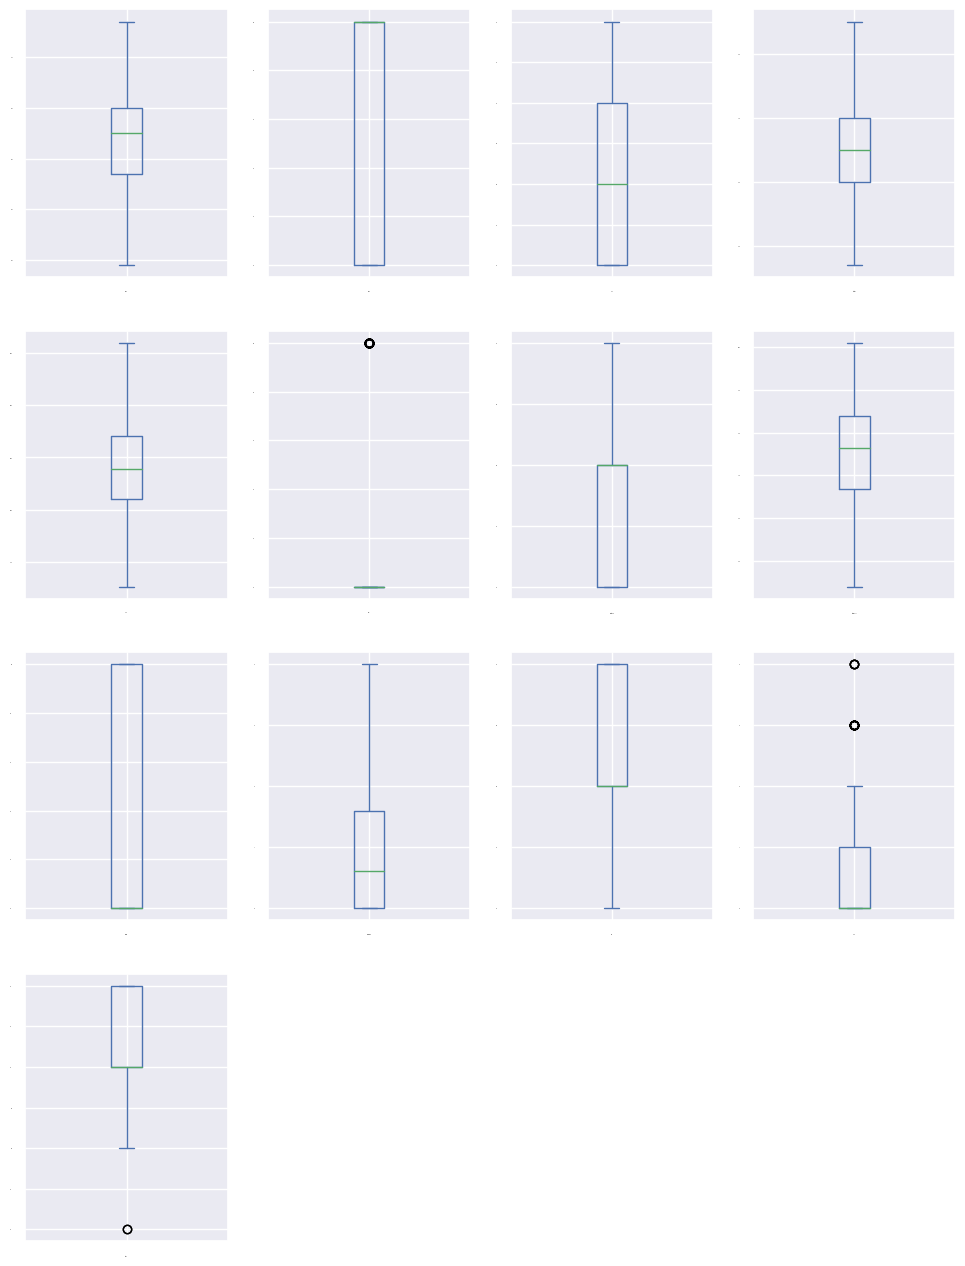

In [132]:
cleaned_hd.plot(kind='box', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

## A few box plots show outliers however those are categorical data hence we can ignore them

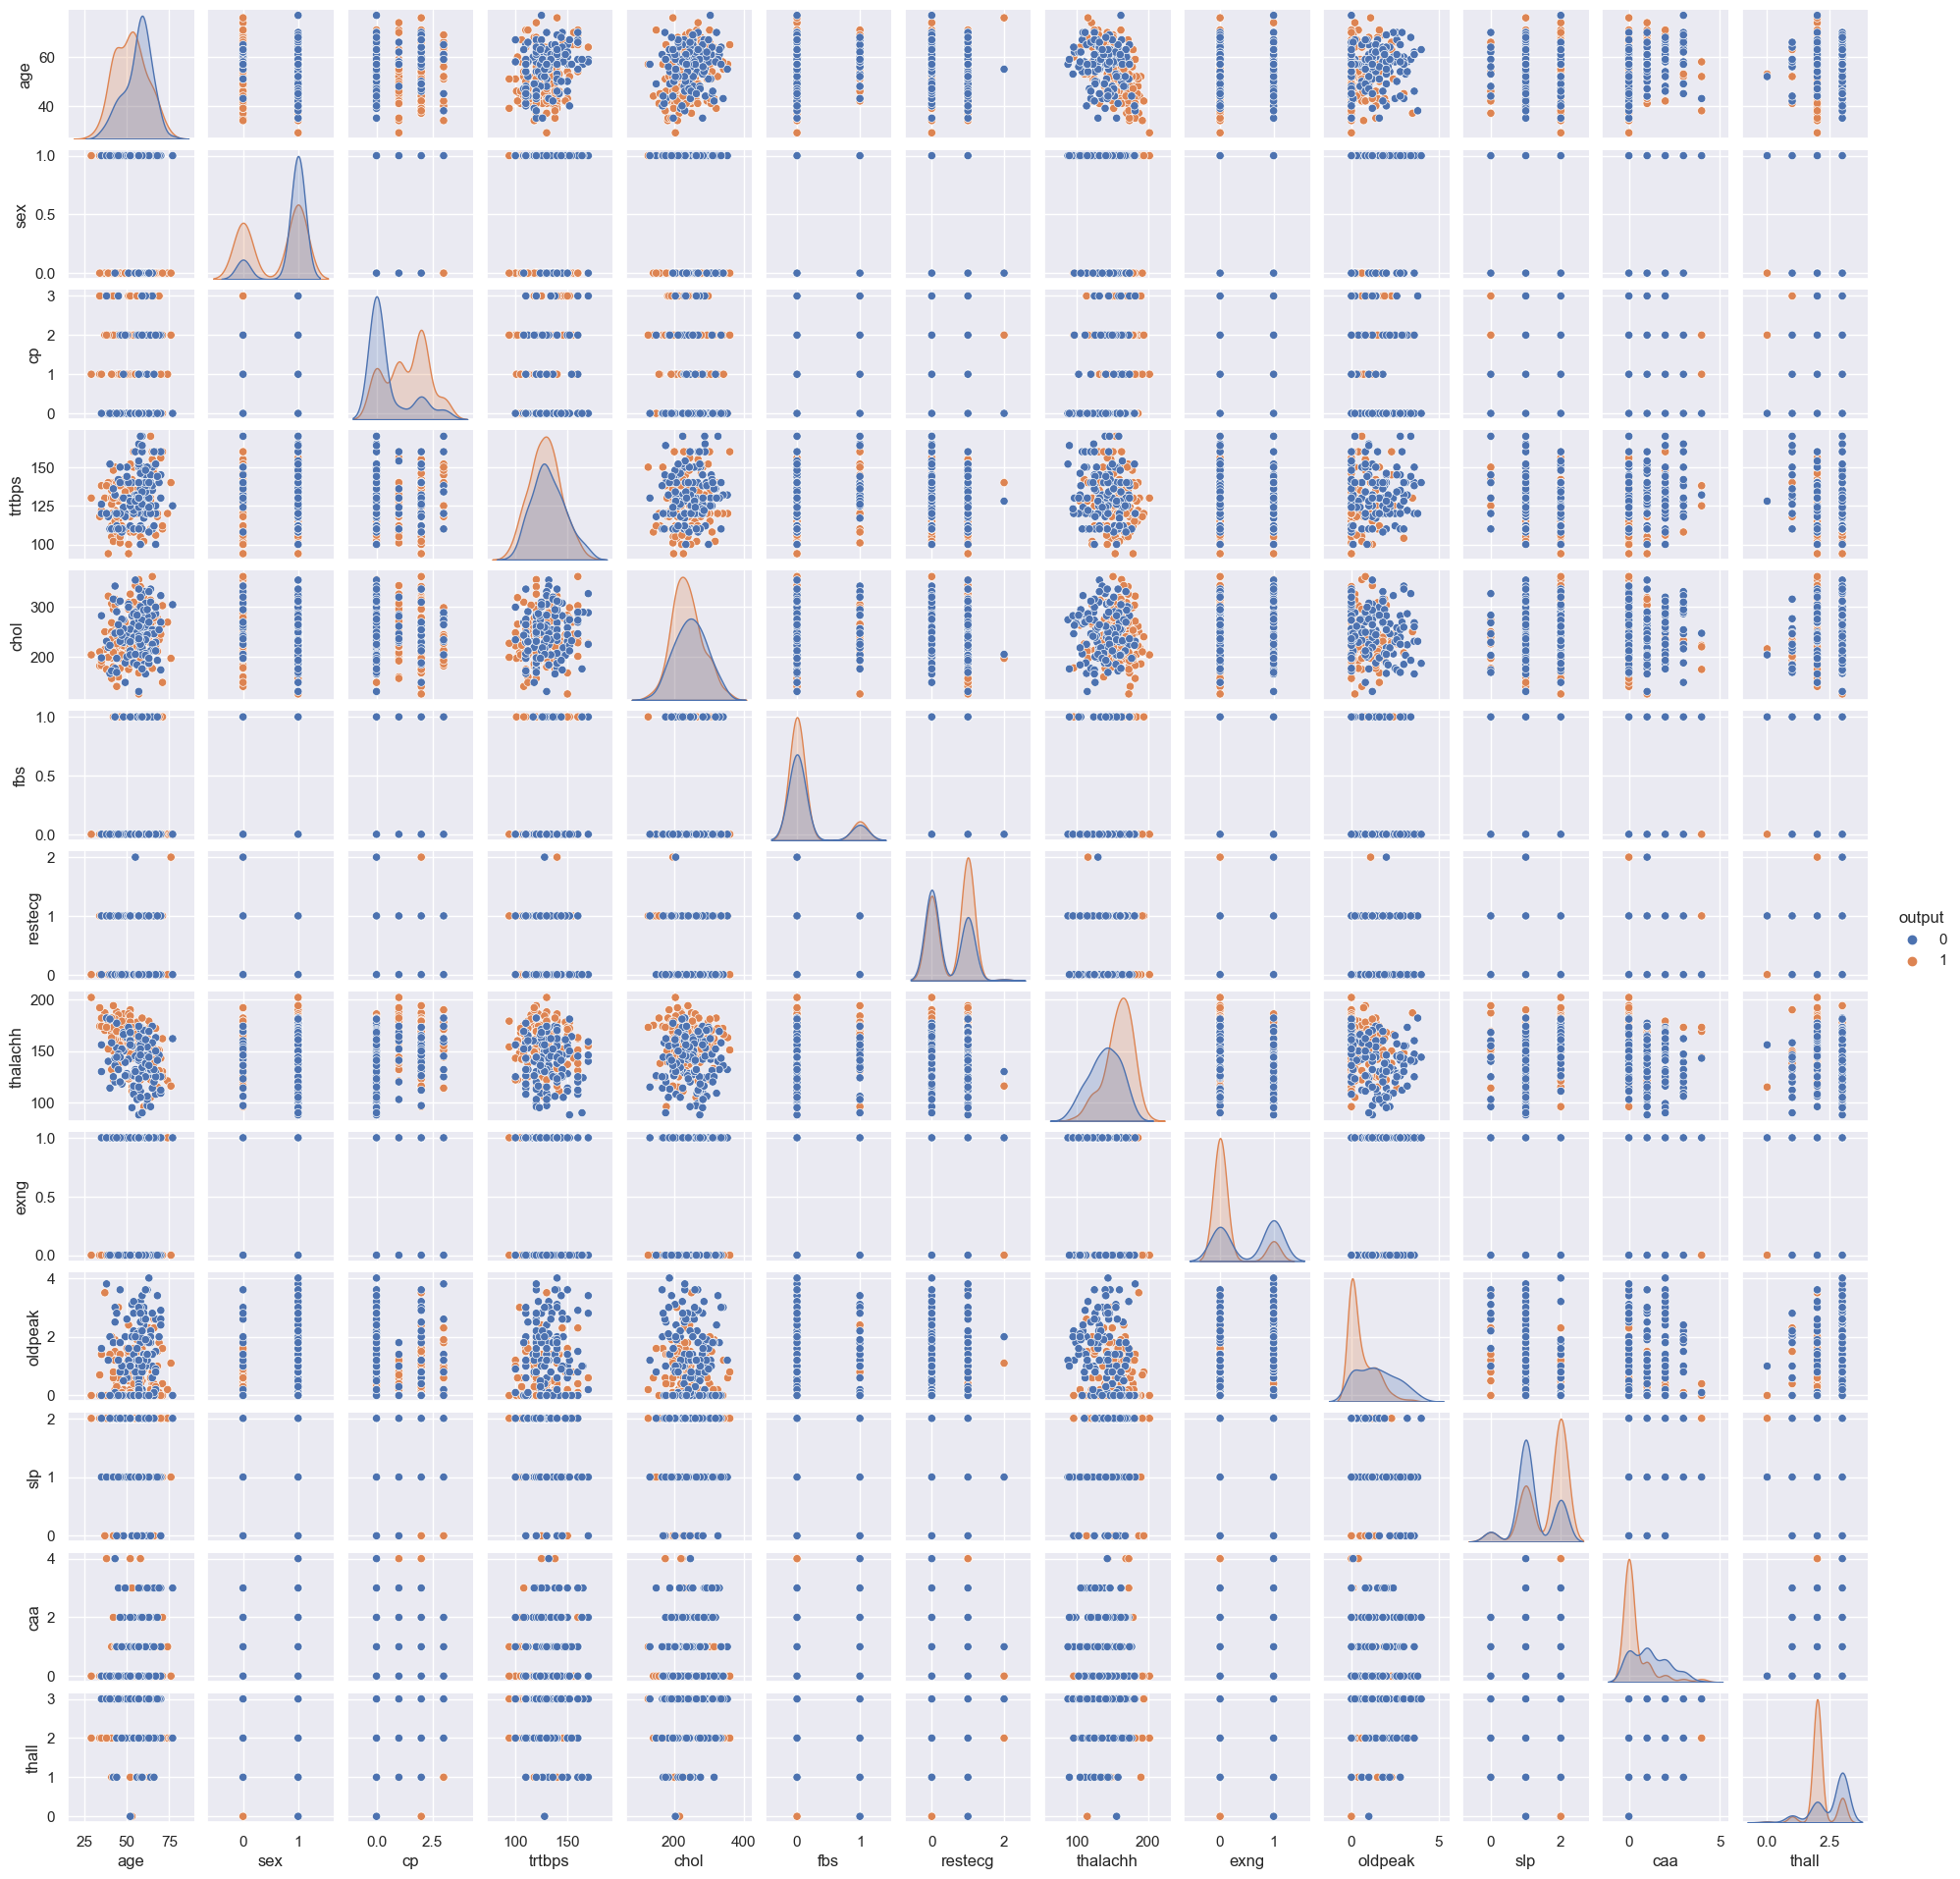

In [133]:
sns.pairplot(cleaned_hd, height=1.5, hue="output");
plt.show()

/var/folders/vc/_11bcz0x3_352ht7ymv34pl40000gn/T/ipykernel_89886/4025625893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_hd.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})


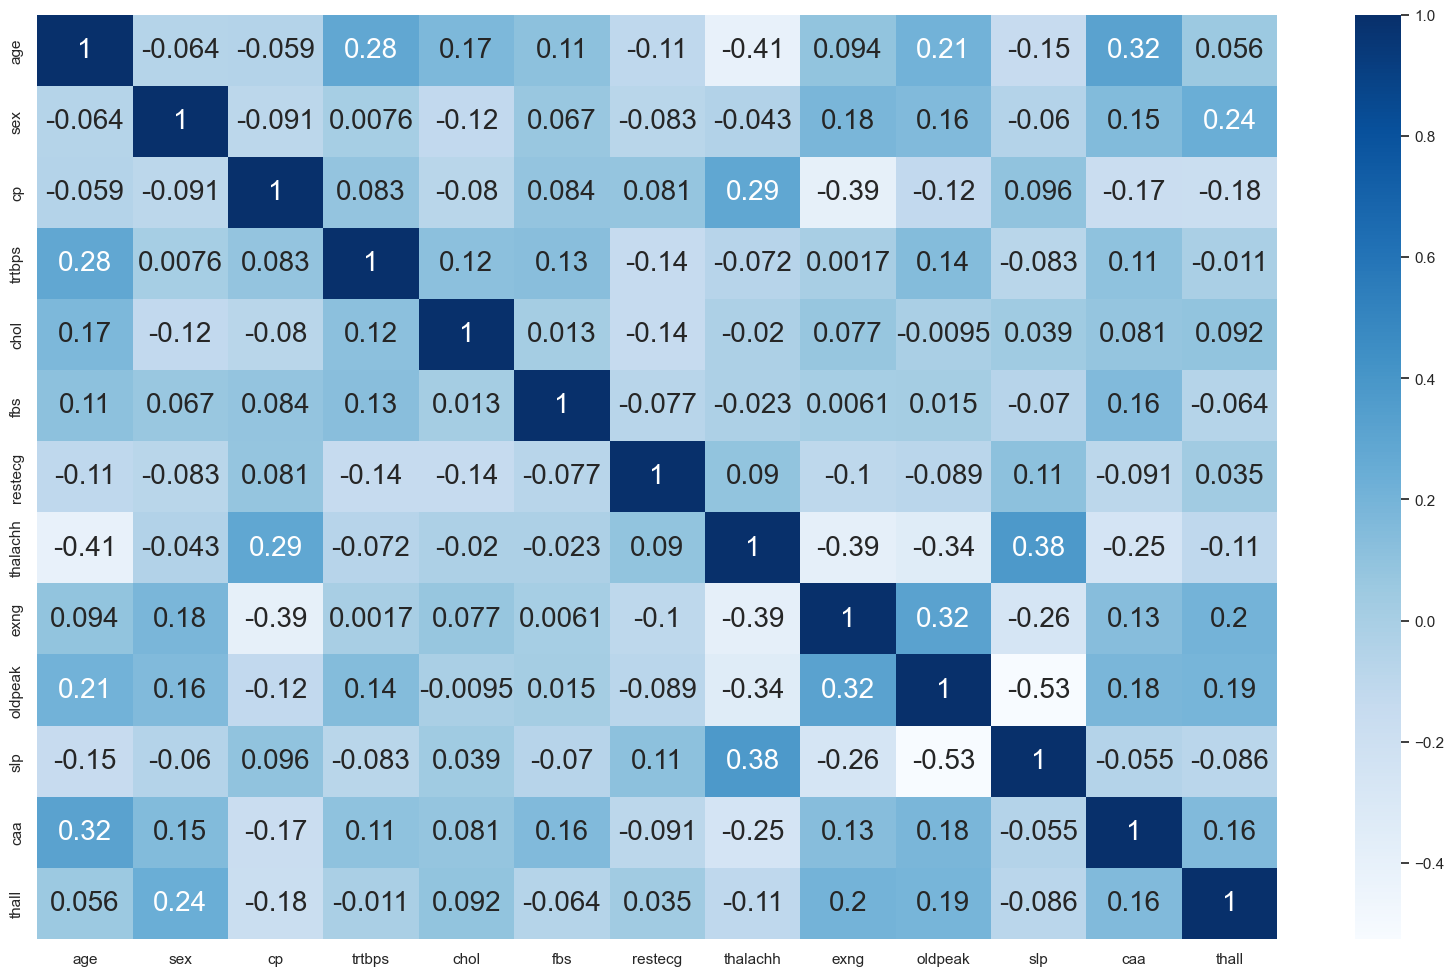

In [134]:
plt.figure(figsize =(20,12))
sns.heatmap(cleaned_hd.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

In [135]:

cleaned_hd.shape

(283, 14)

In [136]:
X = cleaned_hd.iloc[:, 0:13].values
y = cleaned_hd.iloc[:, 13].values

(X.shape, y.shape)

((283, 13), (283,))

In [137]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 13), (57, 13), (226,), (57,))

In [138]:
y_train

[0, 1, 1, 0, 0, ..., 1, 1, 0, 0, 1]
Length: 226
Categories (2, int64): [0, 1]

In [139]:
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [140]:
y_pred = logit_model.predict(X_test)

In [141]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.56      0.65        18
           1       0.82      0.92      0.87        39

    accuracy                           0.81        57
   macro avg       0.79      0.74      0.76        57
weighted avg       0.80      0.81      0.80        57



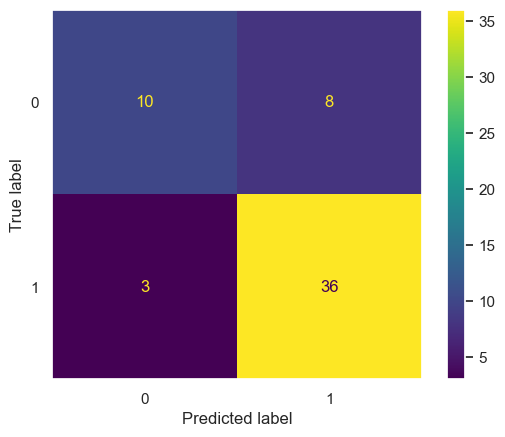

In [142]:
conf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred) )

conf_mat.plot()
plt.grid(False)

In [112]:
dt_model = DecisionTreeClassifier( random_state=4, max_depth=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=4)

In [143]:
y_pred_dt_model = dt_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        18
           1       0.87      0.85      0.86        39

    accuracy                           0.81        57
   macro avg       0.78      0.78      0.78        57
weighted avg       0.81      0.81      0.81        57



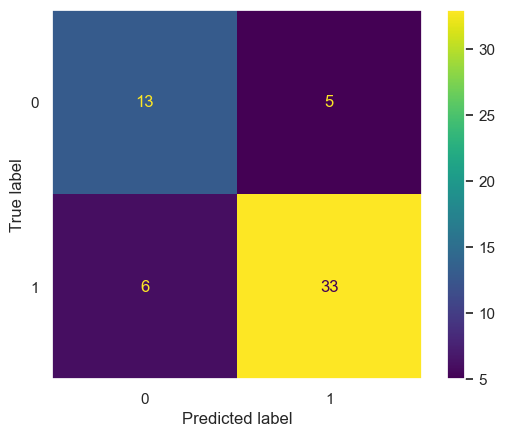

In [144]:
print(classification_report(y_test, y_pred_dt_model))

conf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt_model) )

conf_mat.plot()
plt.grid(False)

## Both above models work similar and produce 81% accuracy for a given dataset